In [ ]:
#Classification Algorithm 
#1. Logistic Regression
#2. Decision Tree classifier
'''1. Gini Index 2. Entropy'''

In [ ]:
#Example of DecisionTREEClassifier on bank.csv file 

In [ ]:
#bank.csv file 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load csv file
df=pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [5]:
df.shape

(11162, 17)

In [6]:
#check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [8]:
#target means output variable : deposit
#Separate input and output variables from dataframe
X=df.drop("deposit",axis=1) #or X=df.iloc[:,:-1]
Y=df["deposit"]  #or Y=df.iloc[:,-1]

In [9]:
#Train_Test_split
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
#create user defined function
def create_model(model): #passing arguments model : object
    model.fit(X_train,Y_train) #train the model with 70% data
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    return model
    

In [13]:
#Createing a baseline model 
#Logistic Regression
from sklearn.linear_model import LogisticRegression


In [14]:
#Create the object of LogisticRegression 
lr=LogisticRegression() 

In [15]:
#classification_report inbuilt class
from sklearn.metrics import classification_report

In [16]:
#call function
create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.77      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.77      3349



LogisticRegression()

In [ ]:
#recall =0.73 good not better
#region : model is overfitting so. less recall then do data analysis 
#but not work on data analysis then use decisiontreeclassifier
#because DT : select imp features means select best features 

In [ ]:
#USE DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
#create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier()  #by default GINI Index

In [19]:
#call function 
#train and test the model with DT
create_model(dt1) 

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.77      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



DecisionTreeClassifier()

In [ ]:
#recall=0.77 it is better than Logistic regression but not much better
#region : model is overfitting

In [20]:
#Check important features then use inbuilt method feature_importances_
#feature_importances_  define in DecisionTreeClassifier class
dt1.feature_importances_
 #Its return a array of scores 
    #reduction =Gini index of complete dataset-gini index of each features
#select whose reduction is high and gini index should be less 

array([0.07895713, 0.03136128, 0.0158177 , 0.01429289, 0.00109811,
       0.08752958, 0.04308551, 0.00585868, 0.06271981, 0.08015626,
       0.0977244 , 0.35037985, 0.01981343, 0.06097832, 0.01413703,
       0.03609001])

In [21]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [22]:
#tree draw
from sklearn import tree

In [23]:
features=X.columns
print("Input variables : ",features)

Input variables :  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


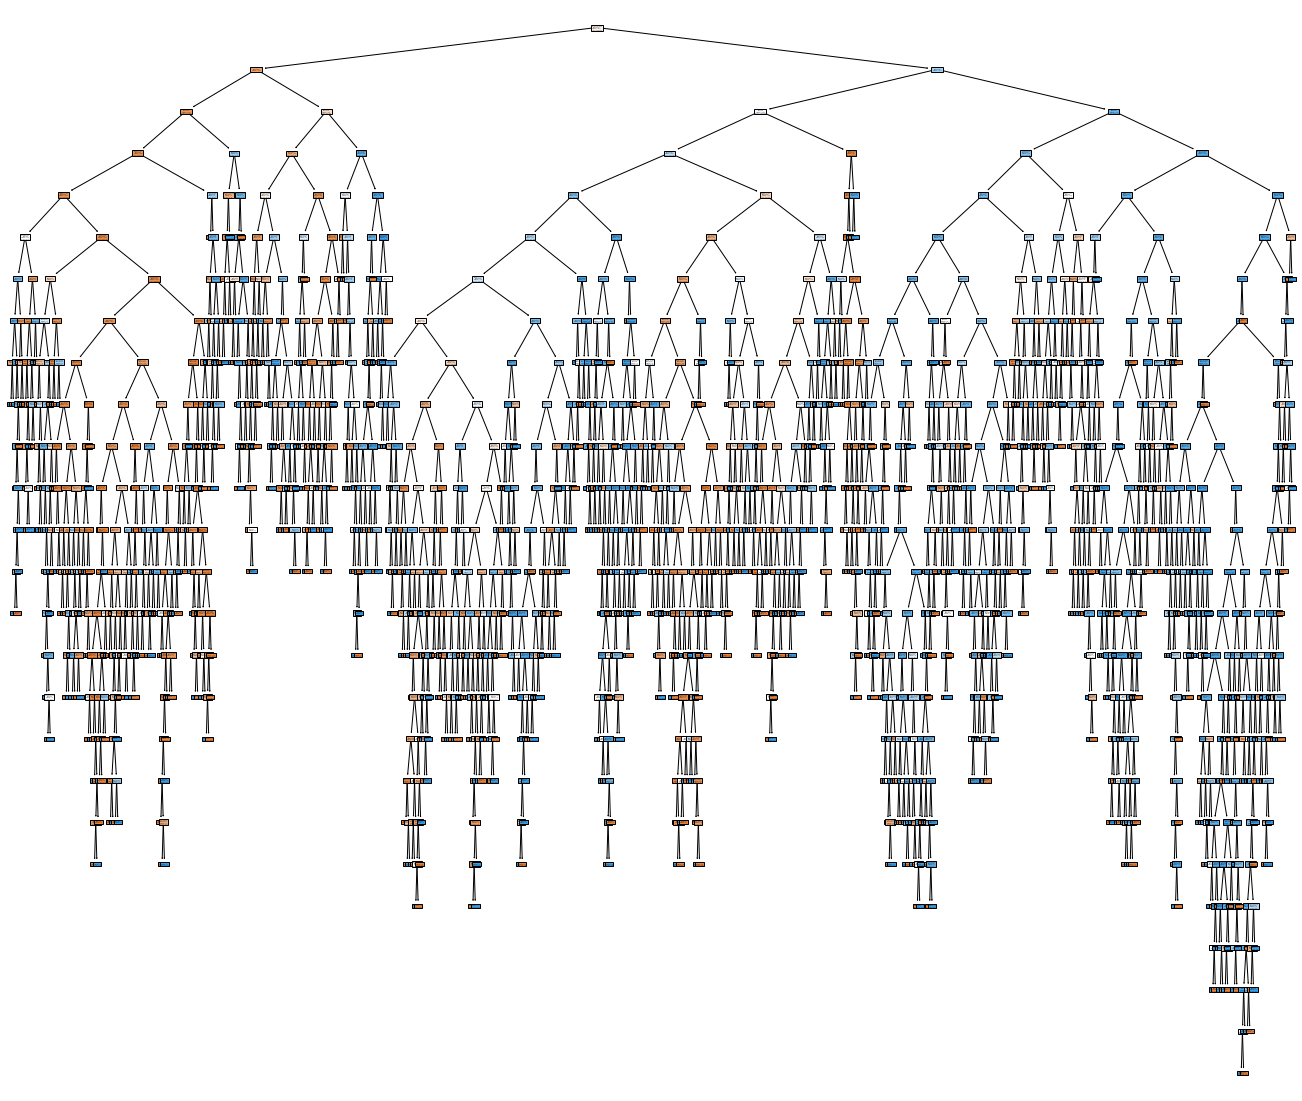

In [24]:
fig=plt.figure(figsize=(23,20)) 
#23 width and 20 height :define graph's page size
_=tree.plot_tree(dt1,feature_names=features,filled=True)
#tree_plot() inbuilt function of tree class

# How we reduced a overfitting situation by using the pruning technique

In [ ]:
#There are various types of pruning technique 
#1. First pruning technique  : With the help of max_depth()

In [ ]:
#create object of DecisionTreeClassifier() and passing argument max_depth
#max_depth can not be more than 8 , can be <=8

In [57]:
#create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(max_depth=3)  #by default GINI Index

In [62]:
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1760
           1       0.71      0.86      0.78      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.78      0.77      3349
weighted avg       0.78      0.77      0.77      3349



In [63]:
dt2.feature_importances_

array([0.03429936, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13912344, 0.        ,
       0.        , 0.70308429, 0.        , 0.05817158, 0.        ,
       0.06532133])

In [56]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

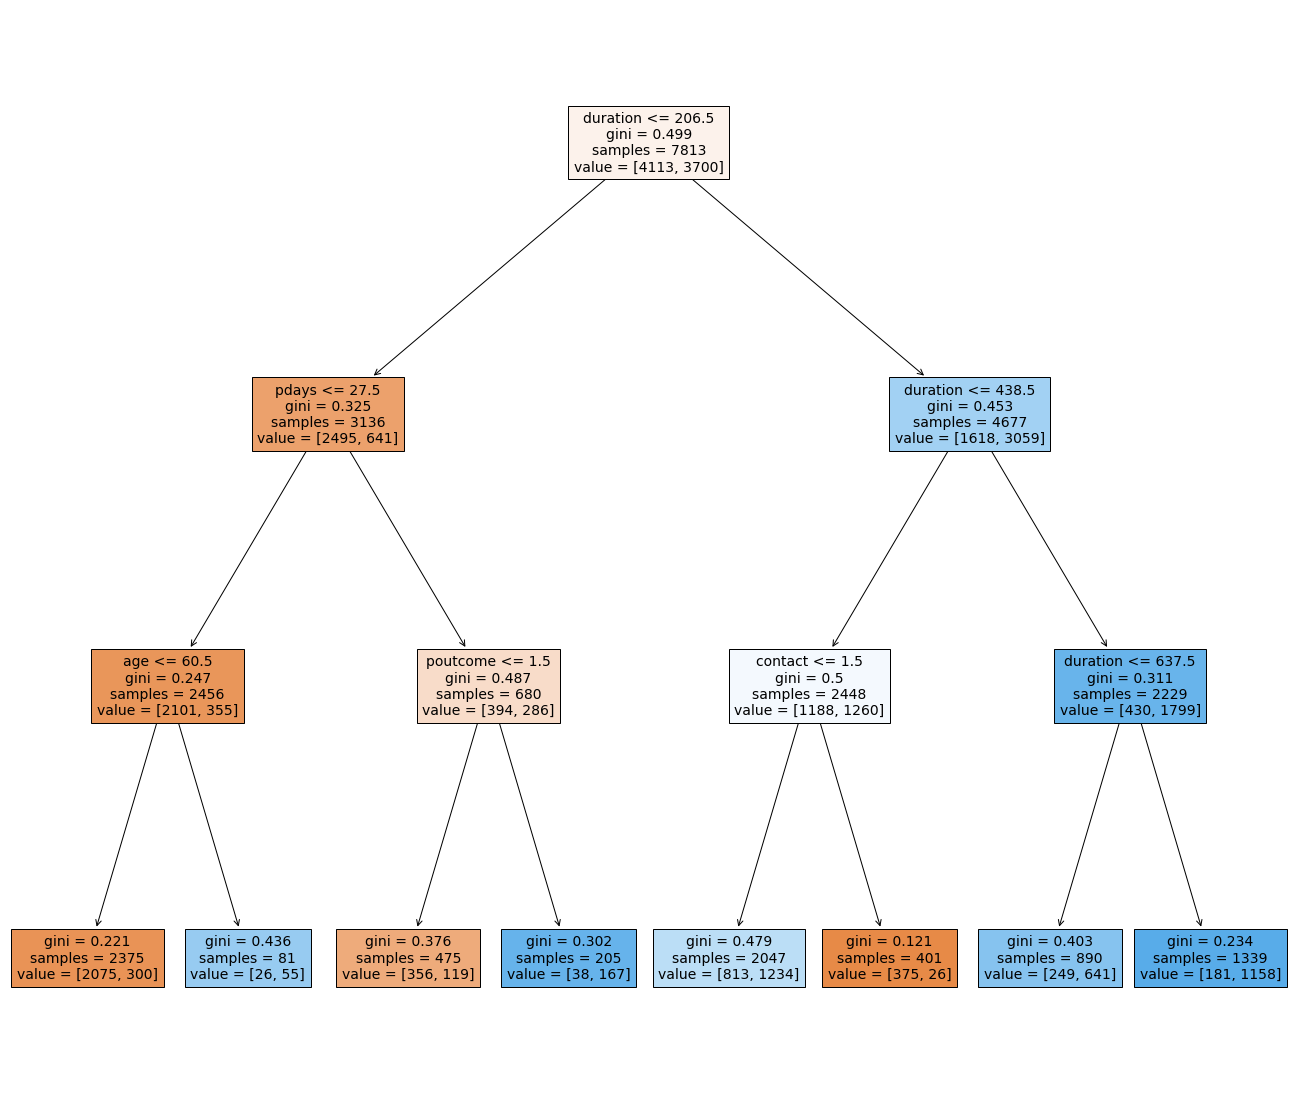

In [60]:
fig=plt.figure(figsize=(23,20)) 
#23 width and 20 height :define graph's page size
_=tree.plot_tree(dt2,feature_names=features,filled=True)
#tree_plot() inbuilt function of tree class

In [ ]:
#second pruning tech. : min_samples_leaf
#How many minimum samples should be there in the leaf node
#min_samples_leaf=45 to 50  atleast 50 but can br more than 50 

In [75]:
#create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(min_samples_leaf=45)  #by default GINI Index

In [76]:
#Call function
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [79]:
dt3.feature_importances_

array([4.39296160e-02, 4.88799764e-03, 0.00000000e+00, 1.97906367e-03,
       0.00000000e+00, 2.15821445e-02, 6.83293597e-02, 3.14324106e-03,
       1.05356626e-01, 5.04643627e-03, 1.09125894e-01, 4.96472434e-01,
       4.12091204e-04, 4.40661418e-02, 3.62939310e-02, 5.93750228e-02])

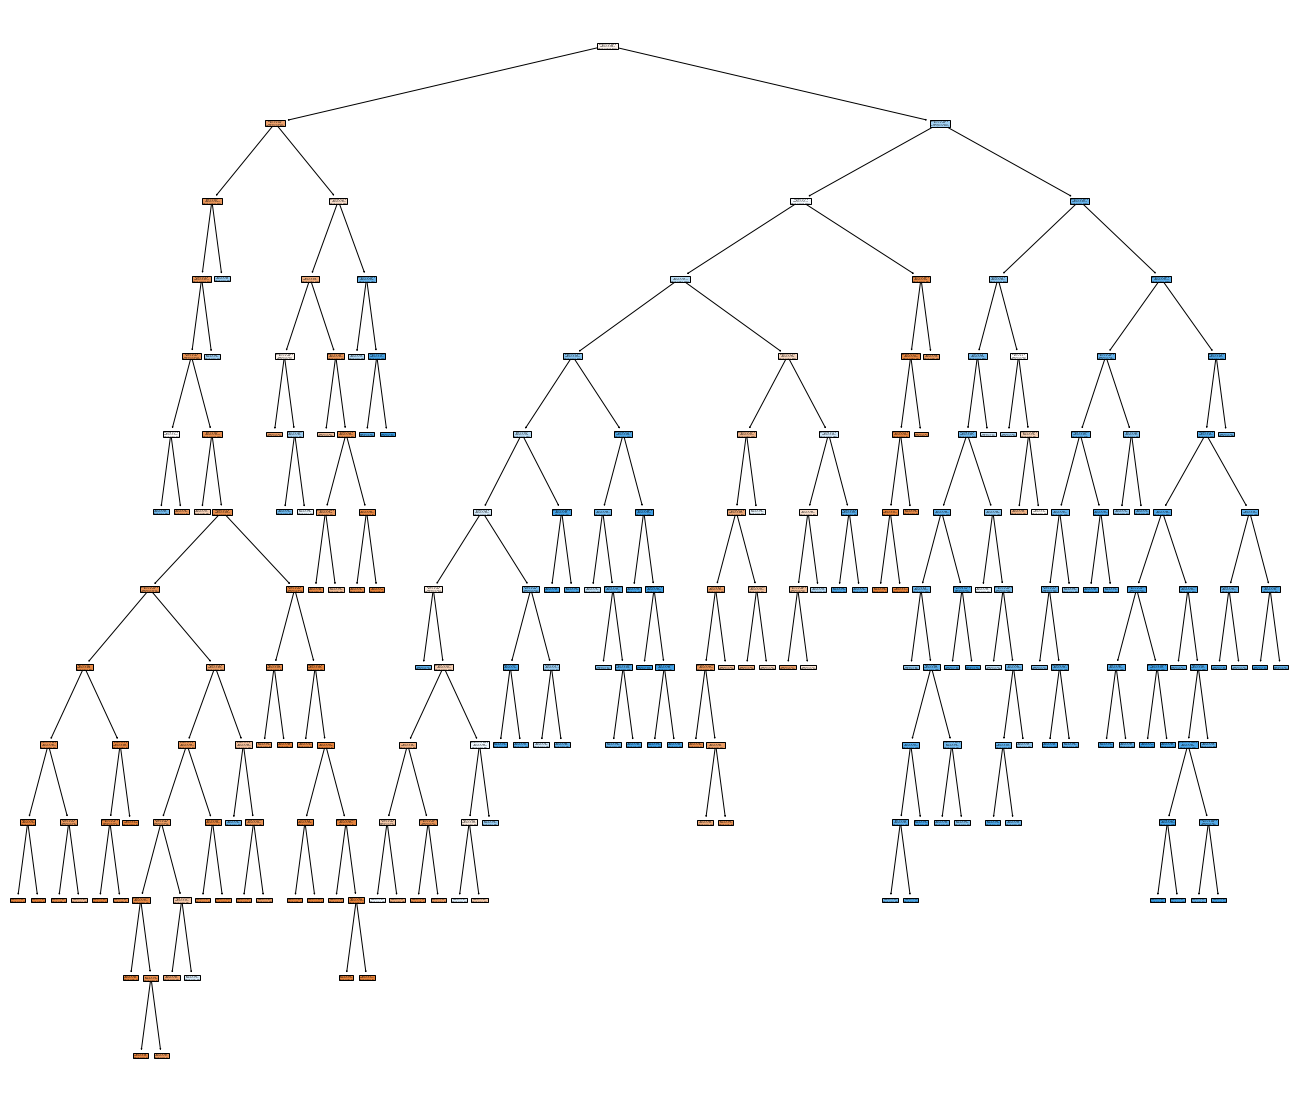

In [78]:
fig=plt.figure(figsize=(23,20)) 
#23 width and 20 height :define graph's page size
_=tree.plot_tree(dt3,feature_names=features,filled=True)
#tree_plot() inbuilt function of tree class

In [82]:
#create object of DecisionTreeClassifier class (entropy)
dt4=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy") 

In [83]:
#call function
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [84]:
dt4.feature_importances_  #show information gain

array([0.02078675, 0.00962947, 0.00093143, 0.0018021 , 0.        ,
       0.02910745, 0.06001505, 0.0026556 , 0.14409574, 0.01361879,
       0.10880883, 0.50973752, 0.00813448, 0.02492468, 0.02735925,
       0.03839285])

In [85]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

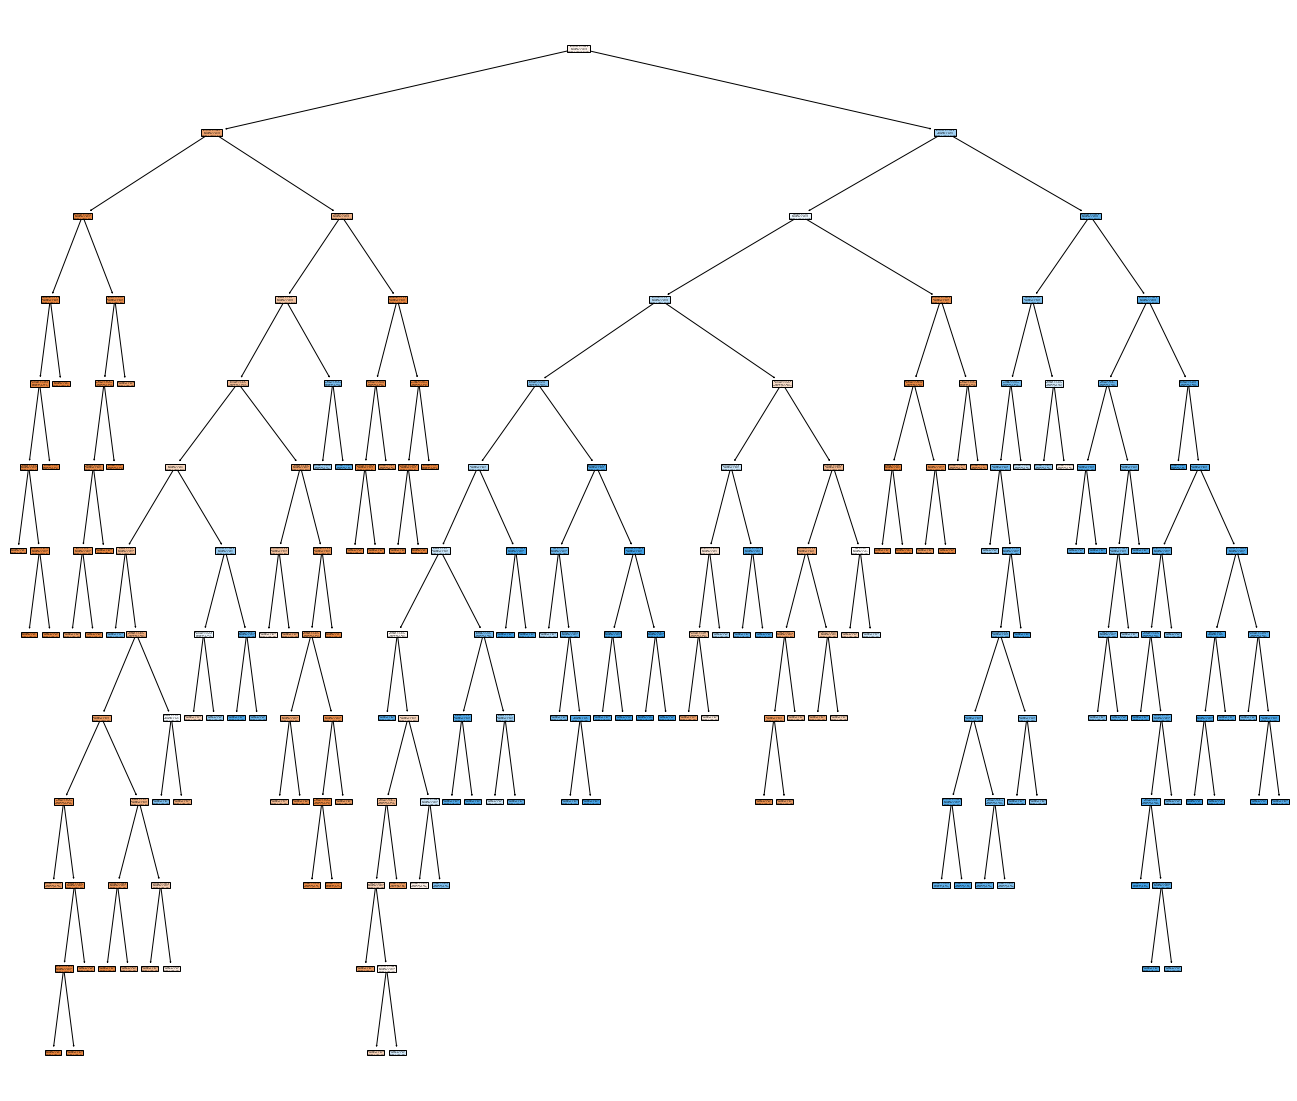

In [86]:
fig=plt.figure(figsize=(23,20)) 
#23 width and 20 height :define graph's page size
_=tree.plot_tree(dt4,feature_names=features,filled=True)
#tree_plot() inbuilt function of tree class

In [ ]:
#use pruning tech of DT : best min_samples_leaf=45  (object dt3)
#with gini index : recall=0.87    in this dataset bank.csv